### 一维数据 可视化reg tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from pprint import pprint
%matplotlib inline
%pprint   # use %pprint command to turn on/off pprint feature:

Pretty printing has been turned OFF


### test on random.rand ~ N(0, 1)

random.rand ~ N(0, 1) 服从正态分布，通过大量采样计算mean var验证

In [2]:
x = np.random.randn(1000000)
x[:20]

array([ 0.90528124, -0.3774405 , -1.2968349 ,  0.10869387, -1.27164644,
       -0.52755956, -0.73767927,  0.34776689,  0.84957086,  1.97635081,
       -0.15998134,  1.78773257, -0.32675676,  0.05848821,  1.38697373,
       -0.18125524, -1.58857848, -1.59660218,  0.68799012,  0.41224086])

In [3]:
x.mean()   # expect 0附近

0.0015873121266760906

In [4]:
x.var()   #variance 1附近

0.997537548538443

### generate test data

In [5]:

y_arr = np.array([])
n = 60
center = [5, 10, 15, 20]  # 以这些数值为中心生成 label: y
parts = len(center)
for c in center:
    y_arr = np.append(y_arr, np.random.randn(n//parts) + c)  # 加入一些扰动
print(y_arr)

[ 4.65072928  5.36103634  6.48767565  5.00771902  6.02889131  5.05976499
  4.38131266  3.91350218  5.79951629  4.06905082  4.03531249  3.34368953
  5.323434    2.76131407  4.7419894  10.376528    9.881773   10.82205459
 10.04819002  9.85579615 10.72391751  9.59536824  8.99245227  9.63336765
 10.42276433 11.5388978  11.64827747 11.16534462 10.63248289 11.21752934
 14.76482824 15.22574995 15.72503157 16.04447544 13.99954761 15.00696599
 16.39876052 14.50322476 15.57566937 15.87476263 16.51128854 15.23577589
 12.98491986 16.59679287 14.86546177 20.02111972 19.26985398 19.22160938
 21.36336955 20.66370544 20.05765977 19.96210926 19.80233489 19.11885233
 19.65130721 18.50882517 20.10318603 18.5855242  20.33423957 20.84792963]


In [6]:
x_arr = np.arange(y_arr.shape[0]) + np.random.randn(y_arr.shape[0])  # 生成 data: x
# np.random.shuffle(x_arr)
print(x_arr[:10])

[1.11808659 3.15334267 1.22847401 5.11100358 4.25128415 3.93459133
 5.01892753 8.86655872 8.67133703 7.87787527]


In [7]:
D = np.stack((x_arr, y_arr), axis=1)   # 用np.stack 将x, y沿axis=1合并
print(D.shape)
print(D[:10])

(60, 2)
[[1.11808659 4.65072928]
 [3.15334267 5.36103634]
 [1.22847401 6.48767565]
 [5.11100358 5.00771902]
 [4.25128415 6.02889131]
 [3.93459133 5.05976499]
 [5.01892753 4.38131266]
 [8.86655872 3.91350218]
 [8.67133703 5.79951629]
 [7.87787527 4.06905082]]


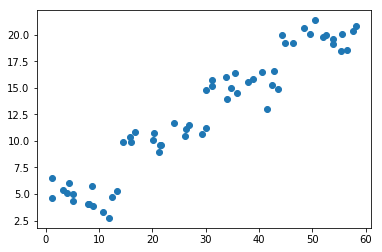

In [8]:
plt.scatter(D[:, 0], D[:, 1])

### build regression tree

In [9]:
def split_dataset(D, value):  # dataset, splitting value
    '''
    根据 value 将D 划分为 >, <= 两部分
    '''
    D_lte = D[ D[:, 0] <= value ]
    D_gt = D[ D[:, 0] > value]
#     if not np.any(D_lte):
#         D_lte = None
#     if not np.any(D_gt):
#         D_gt = None
    return D_lte, D_gt
    

In [10]:
# split_dataset(D, 0)
# dir(split_dataset)
# print(split_dataset.__doc__)

In [11]:
def cal_err(D):
    '''
    用平方误差度量训练误差
    '''
    if not np.any(D):  # empty array return err 0
        return 0
#     1.
#     ave = np.mean(D[:, 1])
#     return np.sum((D[:, 1] - ave)**2)
#     2.
    return np.var(D[:, 1]) * D.shape[0]   # 方差*N = sigma[(y-ave)**2]

In [12]:
# a = np.array([[1,1], [2, 4]])
# cal_err(a)

In [13]:
# cal_err(D)

In [14]:
# cal_err([])

In [15]:
# D1, D2 = split_dataset(D, 10)
# print(cal_err(D1), cal_err(D2))

In [16]:
max_depth = 3

def build_reg_tree(D, depth = 1):
#     print('-'*20)
#     print(D, depth)
    if depth == max_depth:
        if np.any(D):
            node = {'type':'end', 'value':np.mean(D[:,1])}  # 'end' node
            return node
        else:
            return None
    else:
        min_err = np.inf  # np.inf
        idx = -1
        for i in range(D.shape[0]): # try all possible split value
            D1, D2 = split_dataset(D, D[i][0])
            total_err = cal_err(D1) + cal_err(D2)  # calculate total error
            if total_err < min_err:
                min_err = total_err
                idx = i   # save best split index
                
        best_D1, best_D2 = split_dataset(D, D[idx][0])
        node = {'type':'decision', 'split_x':D[idx][0], 'lte_node':None, 'gt_node':None}
        if np.any(best_D1):
            node['lte_node'] = build_reg_tree(best_D1, depth+1)  # built tree recursively
        if np.any(best_D2):
            node['gt_node'] = build_reg_tree(best_D2, depth+1)
        return node
                

In [17]:
reg_tree = build_reg_tree(D)
pprint(reg_tree)

{'gt_node': {'gt_node': {'type': 'end', 'value': 19.834108410277114},
             'lte_node': {'type': 'end', 'value': 15.033174022433641},
             'split_x': 43.49527931071111,
             'type': 'decision'},
 'lte_node': {'gt_node': {'type': 'end', 'value': 10.381229610527042},
              'lte_node': {'type': 'end', 'value': 4.730995869368746},
              'split_x': 13.277142274037509,
              'type': 'decision'},
 'split_x': 29.278172593730442,
 'type': 'decision'}


In [18]:
def _predict_one(node, x_test):
    '''
    predict one test sample
    '''
    if node['type'] == 'decision':
        if x_test > node['split_x']:
            return _predict_one(node['gt_node'], x_test)
        else:
            return _predict_one(node['lte_node'], x_test)
    else: # 'end' node
        return node['value']
    
def predict(node, x_test_arr):
    '''
    predict multiple test samples
    x_test_arr: list or np.array
    '''
    res_list = []
    for d in x_test_arr:
        res_list.append(_predict_one(node, d))
    return np.array(res_list)

In [19]:
# plt.scatter(D[:, 0], D[:, 1])
_predict_one(reg_tree, 10)

4.730995869368746

In [20]:
predict(reg_tree, [10, 20, 30])

array([ 4.73099587, 10.38122961, 15.03317402])

In [21]:
print('predict result: ', predict(reg_tree, D[:, 0]))
print('ground truth: ', D[:, 1])

predict result:  [ 4.73099587  4.73099587  4.73099587  4.73099587  4.73099587  4.73099587
  4.73099587  4.73099587  4.73099587  4.73099587  4.73099587  4.73099587
  4.73099587  4.73099587  4.73099587 10.38122961 10.38122961 10.38122961
 10.38122961 10.38122961 10.38122961 10.38122961 10.38122961 10.38122961
 10.38122961 10.38122961 10.38122961 10.38122961 10.38122961 15.03317402
 15.03317402 15.03317402 15.03317402 15.03317402 15.03317402 15.03317402
 15.03317402 15.03317402 15.03317402 15.03317402 15.03317402 15.03317402
 15.03317402 15.03317402 15.03317402 19.83410841 19.83410841 19.83410841
 19.83410841 19.83410841 19.83410841 19.83410841 19.83410841 19.83410841
 19.83410841 19.83410841 19.83410841 19.83410841 19.83410841 19.83410841]
ground truth:  [ 4.65072928  5.36103634  6.48767565  5.00771902  6.02889131  5.05976499
  4.38131266  3.91350218  5.79951629  4.06905082  4.03531249  3.34368953
  5.323434    2.76131407  4.7419894  10.376528    9.881773   10.82205459
 10.04819002  9.85

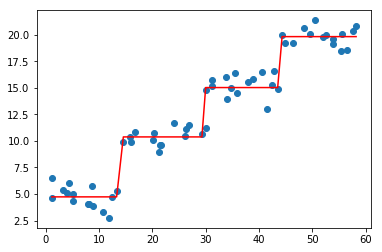

In [22]:
plt.scatter(D[:, 0], D[:, 1])

idx = np.argsort(D[:, 0])  # sort on x dim
sorted_D = D[idx, 0]
plt.plot(sorted_D, predict(reg_tree, sorted_D), c = 'r')   # draw regression line

### using sklearn 

In [23]:
from sklearn import tree

In [47]:
clf = tree.DecisionTreeRegressor(random_state=0)
X = D[:, 0][:, np.newaxis]
y = D[:, 1]
X_sorted = X[np.argsort(X, axis=0).flatten()]
X = X_sorted

clf.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [48]:
clf.predict([[10], [20]])

array([3.34368953, 9.85579615])

In [49]:
np.argsort(X, axis=0)[:10]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [50]:
# np.argsort(X, axis=0).flatten()

In [51]:
# X_sorted = X[np.argsort(X, axis=0).flatten()]
# print(X[:10])
# print(X_sorted[:10])

In [52]:
y_predict = clf.predict(X)
print(y_predict)

[ 4.65072928  5.36103634  6.48767565  5.00771902  6.02889131  5.05976499
  4.38131266  3.91350218  5.79951629  4.06905082  4.03531249  3.34368953
  5.323434    2.76131407  4.7419894  10.376528    9.881773   10.82205459
 10.04819002  9.85579615 10.72391751  9.59536824  8.99245227  9.63336765
 10.42276433 11.5388978  11.64827747 11.16534462 10.63248289 11.21752934
 14.76482824 15.22574995 15.72503157 16.04447544 13.99954761 15.00696599
 16.39876052 14.50322476 15.57566937 15.87476263 16.51128854 15.23577589
 12.98491986 16.59679287 14.86546177 20.02111972 19.26985398 19.22160938
 21.36336955 20.66370544 20.05765977 19.96210926 19.80233489 19.11885233
 19.65130721 18.50882517 20.10318603 18.5855242  20.33423957 20.84792963]


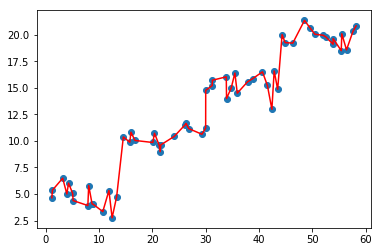

In [62]:
plt.scatter(X, y)
plt.plot(X, y_predict, c = 'r')   # we can see overfitting!!! not set maxdepth

In [63]:
clf.score(X, y)

1.0

#### solve overfitting by set maxdepth

In [64]:
clf_2 = tree.DecisionTreeRegressor(random_state=0, max_depth=2)
clf_2.fit(X, y)
y_predict_2 = clf_2.predict(X)

In [65]:
clf_2.predict([[10], [20], [30]])

array([ 4.73099587, 10.43698293, 15.28755033])

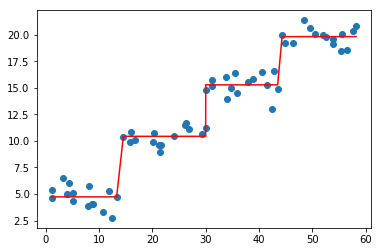

In [66]:
plt.scatter(X, y)
plt.plot(X, y_predict_2, c = 'r')   # we can see overfitting!!!

In [67]:
clf_2.score(X, y)

0.9765270291536299

visualize reg tree

In [72]:
from sklearn.tree import export_graphviz
export_graphviz(clf_2, out_file='tree.dot', filled=True, impurity=False)

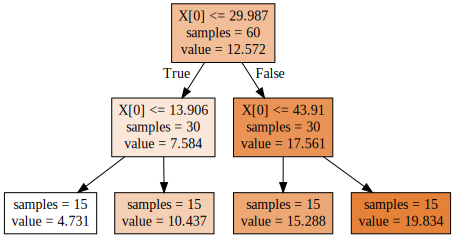

In [74]:
import graphviz
with open('tree.dot') as f:
    dot_graph =f.read()
graphviz.Source(dot_graph)

In [75]:
clf_2.feature_importances_

array([1.])

In [59]:
D[:, 0][:, np.newaxis].shape  # add one axis to fit sklearn

(60, 1)

In [35]:
D[:, 1].shape

(60,)

### some test scripts

In [36]:
idx = np.argsort(D[:, 0])
idx

array([ 0,  2,  1,  5,  4,  6,  3,  9, 10,  8,  7, 11, 13, 14, 12, 16, 15,
       19, 17, 18, 20, 22, 21, 23, 26, 24, 27, 25, 28, 30, 29, 32, 31, 33,
       34, 35, 36, 37, 38, 39, 40, 42, 41, 43, 44, 45, 47, 46, 49, 50, 48,
       52, 51, 54, 53, 55, 56, 57, 58, 59])

In [37]:
D[:, 0]

array([ 1.11808659,  3.15334267,  1.22847401,  5.11100358,  4.25128415,
        3.93459133,  5.01892753,  8.86655872,  8.67133703,  7.87787527,
        8.03371627, 10.68067941, 13.27714227, 11.8283613 , 12.42826971,
       15.74304269, 14.53541942, 16.71434618, 20.06300715, 15.96602396,
       20.38024449, 21.43620142, 21.26489866, 21.56904451, 26.15498821,
       26.81685778, 24.06955503, 26.30495214, 29.27817259, 29.9922388 ,
       29.98217063, 31.24699371, 31.20706834, 33.84834115, 33.90171728,
       34.78325475, 35.46770376, 35.91314422, 37.84146491, 38.80471305,
       40.6427773 , 42.41010031, 41.56555166, 42.83734081, 43.49527931,
       44.32435667, 46.32884951, 44.88963794, 50.47924654, 48.52787856,
       49.55545714, 52.55450284, 52.02268449, 53.90403507, 53.88575288,
       55.42426514, 55.53015455, 56.41417584, 57.62738361, 58.21435465])

In [38]:
D[idx, 0]

array([ 1.11808659,  1.22847401,  3.15334267,  3.93459133,  4.25128415,
        5.01892753,  5.11100358,  7.87787527,  8.03371627,  8.67133703,
        8.86655872, 10.68067941, 11.8283613 , 12.42826971, 13.27714227,
       14.53541942, 15.74304269, 15.96602396, 16.71434618, 20.06300715,
       20.38024449, 21.26489866, 21.43620142, 21.56904451, 24.06955503,
       26.15498821, 26.30495214, 26.81685778, 29.27817259, 29.98217063,
       29.9922388 , 31.20706834, 31.24699371, 33.84834115, 33.90171728,
       34.78325475, 35.46770376, 35.91314422, 37.84146491, 38.80471305,
       40.6427773 , 41.56555166, 42.41010031, 42.83734081, 43.49527931,
       44.32435667, 44.88963794, 46.32884951, 48.52787856, 49.55545714,
       50.47924654, 52.02268449, 52.55450284, 53.88575288, 53.90403507,
       55.42426514, 55.53015455, 56.41417584, 57.62738361, 58.21435465])

In [39]:
a = np.array([[1,1], [2, 4]])
cal_err(D)

1937.7662588047017

In [40]:
5 <np.inf

True